<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Выполнила работу Омарова Джума группа ПИН-б-о-22-1**

# **Лабораторная работа 8. Построение пайплайна одномерной регрессии**

# **Первичный анализ**

Описание набора данных:

Набор данных "Shopping dataset" содержит информацию о клиентах, покупках и их характеристиках. Включает следующие признаки:

Customer ID: Уникальный идентификатор клиента, используемый для отслеживания и анализа.

Gender: Пол клиента, который может быть категоризирован как мужской, женский или небинарный.

Income: Уровень дохода клиента, обычно категоризированный по доходным группам или диапазонам.

Spending Score: Числовая оценка, присвоенная каждому клиенту на основе их потребительского поведения.

Age: Возраст клиента, обычно категоризированный по возрастным группам или диапазонам.

Этот набор данных предназначен для анализа поведения потребителей в магазинах. Возможные модели, которые можно построить на основе этого набора данных, включают:

Прогнозирование расходов клиентов на основе их пола, возраста и уровня дохода.

Сегментация клиентов на основе их потребительского поведения и создание персонализированных маркетинговых стратегий.

Идентификация наиболее прибыльных клиентов и разработка программ лояльности, направленных на удержание этих клиентов.

---

Форма набора данных:

Количество элементов набора данных: 200.

Количество признаков: 5 признаков (Customer ID, Gender, Income, Spending Score, Age).

Количество пропущенных значений: Нет

Статистические значения:

In [ ]:
# Рассчитать статистические показатели
stats = dataset.describe()

# Вывести статистические показатели
print(stats)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


numpy: Это библиотека для работы с многомерными массивами и матрицами, а также с функциями, предназначенными для операций над этими массивами. В контексте data science numpy часто используется для обработки данных, выполнения математических операций, а также для работы с массивами данных, что делает его незаменимым инструментом для эффективной работы с данными.

matplotlib: Это библиотека для создания статических, интерактивных и анимированных визуализаций данных в Python. Она широко используется для построения графиков, диаграмм и других визуальных представлений данных, что делает ее полезной для исследования данных, визуализации результатов и коммуникации выводов.

pandas: Это библиотека для анализа данных, предоставляющая мощные структуры данных, такие как DataFrame, которые удобны для работы с табличными данными. Она предоставляет множество функций для чтения, записи, фильтрации, сортировки и агрегирования данных, что делает ее одним из основных инструментов для работы с данными в Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружает данные из CSV-файла с именем "Shopping_data.csv" в формате DataFrame с помощью библиотеки pandas. Предполагается, что файл "Shopping_data.csv" содержит данные о покупках или связанные с этими данными.

После загрузки данных они сохраняются в переменной dataset. Для того чтобы увидеть содержимое загруженных данных, код выводит содержимое dataset, что позволяет пользователю просмотреть первые несколько строк данных и их структуру.

In [ ]:
dataset = pd.read_csv("dataset/Shopping_data.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Разделяет загруженные данные на матрицу признаков X и вектор зависимой переменной y.

X содержит все столбцы (признаки), кроме последнего, из загруженного DataFrame dataset. Это обычно делается для изоляции независимых переменных, которые будут использоваться для прогнозирования или классификации.

y содержит только последний столбец из загруженного DataFrame dataset, который обычно представляет собой зависимую переменную или целевую переменную, которую мы хотим предсказать или классифицировать.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("Матрица признаков"); print(X)
print("Зависимая переменная"); print(y)

Матрица признаков
[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]
 [5 'Female' 31 17]
 [6 'Female' 22 17]
 [7 'Female' 35 18]
 [8 'Female' 23 18]
 [9 'Male' 64 19]
 [10 'Female' 30 19]
 [11 'Male' 67 19]
 [12 'Female' 35 19]
 [13 'Female' 58 20]
 [14 'Female' 24 20]
 [15 'Male' 37 20]
 [16 'Male' 22 20]
 [17 'Female' 35 21]
 [18 'Male' 20 21]
 [19 'Male' 52 23]
 [20 'Female' 35 23]
 [21 'Male' 35 24]
 [22 'Male' 25 24]
 [23 'Female' 46 25]
 [24 'Male' 31 25]
 [25 'Female' 54 28]
 [26 'Male' 29 28]
 [27 'Female' 45 28]
 [28 'Male' 35 28]
 [29 'Female' 40 29]
 [30 'Female' 23 29]
 [31 'Male' 60 30]
 [32 'Female' 21 30]
 [33 'Male' 53 33]
 [34 'Male' 18 33]
 [35 'Female' 49 33]
 [36 'Female' 21 33]
 [37 'Female' 42 34]
 [38 'Female' 30 34]
 [39 'Female' 36 37]
 [40 'Female' 20 37]
 [41 'Female' 65 38]
 [42 'Male' 24 38]
 [43 'Male' 48 39]
 [44 'Female' 31 39]
 [45 'Female' 49 39]
 [46 'Female' 24 39]
 [47 'Female' 50 40]
 [48 'Female' 27 40]
 [49 'Female' 29 40

Проверяет наличие пропущенных значений в загруженных данных с помощью метода isnull() и суммирует количество пропущенных значений в каждом столбце с помощью метода sum().

In [ ]:
# Обработка пропущенных значений
# Проверим, есть ли пропущенные значения в данных
print(dataset.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Использует функцию train_test_split из модуля model_selection библиотеки scikit-learn для разделения данных на обучающий и тестовый наборы.

X_train и y_train содержат обучающие признаки и соответствующие обучающие метки соответственно.
X_test и y_test содержат тестовые признаки и соответствующие тестовые метки соответственно.
Параметр test_size задает размер тестового набора в долях от общего числа наблюдений. В данном случае он равен 1/4, что означает, что 25% данных будут выделены для тестирования.

Параметр random_state используется для установки начального состояния генератора случайных чисел, что обеспечивает воспроизводимость разделения данных. Установив его на некоторое фиксированное значение (в данном случае 0), мы можем получить одинаковые результаты при каждом запуске кода.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

Выполняет кодирование категориальных признаков, используя метод One-Hot Encoding, с помощью библиотеки scikit-learn.

Сначала создается ColumnTransformer, который определяет преобразования, применяемые к столбцам данных. В этом случае используется One-Hot Encoding для столбца 'Genre', который находится на позиции 1 (индекс 1) в массиве X.

Метод fit_transform применяется к X_train, чтобы обучить преобразование One-Hot Encoding и применить его к обучающему набору данных, возвращая преобразованные данные X_train_encoded.

Метод transform применяется к X_test, чтобы применить ранее обученное преобразование к тестовому набору данных, возвращая преобразованные данные X_test_encoded.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

regressor.fit(X_train_encoded, y_train)

LinearRegression()

Использует ранее обученное преобразование column_transformer, чтобы применить его к тестовому набору данных X_test. Результат преобразования сохраняется в X_test_encoded.

Затем модель regressor используется для предсказания целевых переменных на основе преобразованных тестовых данных X_test_encoded. Предсказанные значения сохраняются в переменной y_pred.

Наконец, код выводит предсказанные значения, позволяя пользователю оценить производительность модели на тестовых данных.

In [ ]:
X_test_encoded = column_transformer.transform(X_test)

y_pred = regressor.predict(X_test_encoded)

print(y_pred)

[43.21845763 47.87292723 41.13470854 44.02108949 54.54588902 44.08789227
 60.97614027 44.06591871 42.8627461  48.73386182 58.82311622 55.11214496
 51.1794662  47.30711682 39.6057579  60.43920276 59.71137784 44.62734169
 56.282416   38.37230082 55.1922259  54.0523188  59.03443132 56.02075032
 33.22114015 48.59320131 50.04951044 52.11060985 50.59814052 46.46481835
 54.43267142 44.89534198 46.61343881 61.37693121 48.69921903 51.35107047
 49.1000497  56.42644306 47.77961234 37.62595567 58.08956398 49.30503019
 49.01639624 58.79655989 52.34559551 43.78853628 37.26930272 54.95187167
 45.15583399 54.62771118]


Создает точечную диаграмму, чтобы визуализировать соотношение между фактическими значениями (y_test) и предсказанными значениями (y_pred).

plt.scatter(y_test, y_pred, color='red') создает точки на диаграмме, где по оси x располагаются фактические значения (y_test), а по оси y - предсказанные значения (y_pred). Они обозначаются красным цветом.

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2) рисует линию, представляющую идеальное соответствие между фактическими и предсказанными значениями. Эта линия имеет цвет синий.

plt.title('Actual vs Predicted') устанавливает заголовок диаграммы.

plt.xlabel('Actual') и plt.ylabel('Predicted') устанавливают подписи осей x и y соответственно.

plt.show() отображает диаграмму.

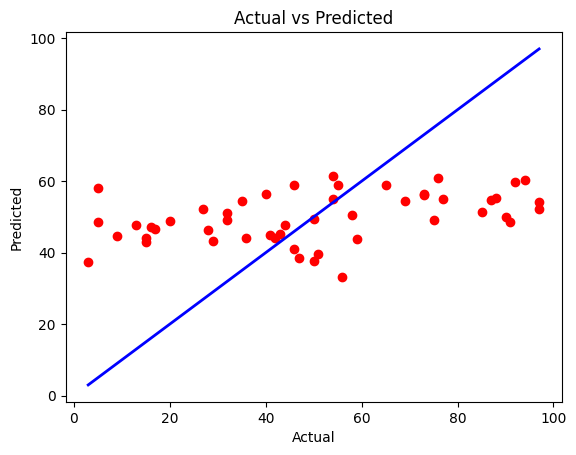

In [ ]:
plt.scatter(y_test, y_pred, color = 'red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue', lw = 2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Применяет объект ColumnTransformer, который, вероятно, был предварительно подготовлен для кодирования признаков входных данных, к обучающим данным X_train. Затем он использует преобразованные данные для предсказания целевой переменной с использованием обученного регрессора regressor. После этого он выводит предсказанные значения y_pred_new.

In [ ]:
X_train_encoded = column_transformer.transform(X_train)

y_pred_new = regressor.predict(X_train_encoded)

print(y_pred_new)

[47.37984228 59.08360824 49.10310171 57.16609484 51.08614682 44.42820442
 38.88166112 42.91419984 38.40360617 45.36085421 48.67579417 47.10270555
 53.72418448 54.32279127 51.77982483 43.90280386 45.89779172 55.33543806
 51.87147184 43.04584759 53.19536253 36.45828049 52.19011096 46.06732513
 55.5175584  45.55487309 35.19676093 50.92119619 51.52265964 52.11872541
 52.96472456 45.92788084 58.63210514 50.16768916 34.15577686 37.23386012
 61.97582792 41.70380604 48.68135809 48.52764215 55.44872898 35.84255772
 44.11425774 40.82796795 44.51764454 37.98114221 55.50984415 46.47834222
 50.49593488 51.77909387 51.43259824 53.43303862 46.35774003 59.96808688
 54.54438736 35.73650027 56.0481613  36.65846774 53.92351709 56.44845635
 54.93420607 55.56701461 56.53100948 44.30943353 59.94356168 56.48630228
 53.71170611 42.4385454  56.16153451 51.70392535 58.47836181 59.11576822
 43.63813039 55.34445247 59.06119363 48.01139486 60.51058831 39.28927193
 42.85487623 47.32663497 54.38577134 58.86721448 60

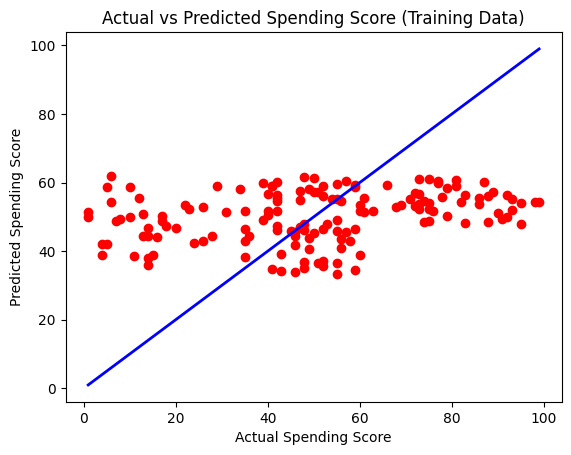

In [ ]:
plt.scatter(y_train, y_pred_new, color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue', lw=2)
plt.title('Actual vs Predicted Spending Score (Training Data)')
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.show()

# **Вывод**

Импортируются необходимые библиотеки, включая NumPy, Matplotlib и Pandas.

Загружается набор данных о покупках клиентов из файла CSV.

Разделяется набор данных на признаки (X) и целевую переменную (y), которая представляет собой расходы клиентов.

Обрабатываются пропущенные значения в наборе данных.

Разделяется набор данных на обучающий и тестовый наборы с помощью функции train_test_split.

Применяется преобразователь столбцов для кодирования категориальных признаков с помощью OneHotEncoder.

Обучается модель регрессии на обучающем наборе данных.

Кодируется тестовый набор данных с использованием того же преобразователя столбцов.

Делаются прогнозы для тестового набора данных с помощью обученной модели.

Оценивается модель, сравнивая фактические расходы с прогнозируемыми расходами.

Отображается график рассеяния, показывающий фактические и прогнозируемые расходы.

Повторяются шаги 6-11 с использованием обучающего набора данных, чтобы оценить производительность модели на данных, которые использовались для ее обучения.

В целом, этот код демонстрирует процесс обучения и оценки модели машинного обучения для прогнозирования расходов клиентов на основе их демографических данных.



### 1. Почему при реализации многомерной линейной регрессии необходимо добавить фиктивный признак с единственным значением 1.0?

Добавление фиктивного признака с единственным значением 1.0 (интерсепта) необходимо для того, чтобы модель могла учитывать постоянное смещение. Этот признак позволяет модели иметь возможность перемещаться вверх или вниз по оси Y, что улучшает ее способность подстраиваться под данные. Без этого признака модель будет вынуждена проходить через начало координат, что может привести к неадекватному описанию зависимости.

### 2. Что такое фиктивная переменная? Поясните причину удаления одной фиктивной переменной, возникающей при перекодировке категориального признака.

**Фиктивная переменная** — это бинарная переменная, используемая для представления категориальных данных в числовом формате. Каждая категория представляется отдельной переменной, принимающей значения 0 или 1.

При перекодировке категориального признака с \( n \) категориями создается \( n \) фиктивных переменных. Однако одну из них обычно удаляют, чтобы избежать **мультиколлинеарности**. Это происходит потому, что наличие всех \( n \) фиктивных переменных приводит к линейной зависимости между ними, что может исказить результаты регрессии.

### 3. С использованием какого класса создается модель полиномиальной регрессии?

В Python для создания модели полиномиальной регрессии обычно используется класс `PolynomialFeatures` из библиотеки `sklearn.preprocessing`, который позволяет генерировать полиномиальные и взаимодействующие признаки. Затем эти признаки можно использовать в модели линейной регрессии, например, с классом `LinearRegression` из `sklearn.linear_model`.

### 4. Поясните принцип преобразования признаков при построении полиномиальной регрессии.

При построении полиномиальной регрессии происходит следующее преобразование признаков:

1. **Генерация полиномиальных признаков**: Используя класс `PolynomialFeatures`, исходные признаки преобразуются в полиномиальные, добавляя все возможные комбинации признаков до заданной степени. Например, для признака \( x \) и степени 2 будут созданы признаки \( x \) и \( x^2 \).

2. **Взаимодействие признаков**: Если есть несколько признаков, также могут быть добавлены взаимодействия между ними (например, \( x_1 \times x_2 \)).

Эти новые признаки затем используются для обучения модели линейной регрессии, что позволяет модели учитывать нелинейные зависимости.

### 5. Возможно ли применение технологий масштабирования признаков при реализации полиномиальной регрессии?

Да, применение технологий масштабирования признаков возможно и рекомендуется при реализации полиномиальной регрессии. Масштабирование (например, с использованием стандартизации или нормализации) помогает улучшить сходимость алгоритмов оптимизации и предотвращает проблемы, связанные с различиями в масштабах признаков. Это особенно важно, когда используются полиномиальные признаки, так как их значения могут значительно варьироваться.